<a href="https://colab.research.google.com/github/udaykiranMogalapu/Bamboo-Classification-using-AdaBoost-Ensemble-Technique-and-Voting-Algorithms-/blob/master/BestFitModel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from sklearn.metrics import accuracy_score, classification_report
import numpy as np
import json


In [ ]:
df = pd.read_csv('/content/Duplicate.csv')

In [ ]:
df['latitude'] = df['.geo'].apply(lambda x: json.loads(x)['coordinates'][1])
df['longitude'] = df['.geo'].apply(lambda x: json.loads(x)['coordinates'][0])

In [ ]:
X = df[['latitude', 'longitude', 'system:index']]
y = df['Class']

In [ ]:
df.drop_duplicates(inplace=True)
df.fillna(df.mean(), inplace=True)

<ipython-input-5-0241e195bf15>:2: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.fillna(df.mean(), inplace=True)


In [ ]:
from sklearn.model_selection import train_test_split
global X_train, X_test, y_train, y_test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5)


In [ ]:
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier


In [ ]:
svm = SVC(probability=True)
nb = GaussianNB()

rf = RandomForestClassifier(
        n_estimators=10,          # Decrease the number of trees in the forest
        max_depth=5,              # Limit the maximum depth of each tree
        min_samples_split=5,      # Set a minimum number of samples to split a node
        min_samples_leaf=5,       # Set a minimum number of samples per leaf
        max_features='sqrt',      # Limit the number of features considered for splitting
        random_state=42           # Set a random seed for reproducibility
    )


cart = DecisionTreeClassifier(
        max_depth=2,              # Further limit the maximum depth of the tree
        min_samples_leaf=20,      # Increase the minimum number of samples per leaf
        min_samples_split=20,     # Increase the minimum number of samples to split a node
        min_impurity_decrease=0.005  # Prune nodes with impurity decrease less than 0.005
    )




In [ ]:
svm_ensemble = AdaBoostClassifier(base_estimator=svm)
nb_ensemble = AdaBoostClassifier(base_estimator=nb)

rf_ensemble = AdaBoostClassifier(
        estimator=rf,
        n_estimators=50,          # Increase the number of boosting rounds (optional)
        random_state=42           # Set a random seed for reproducibility
    )
cart_ensemble = AdaBoostClassifier(
        estimator=cart,
        n_estimators=50,          # You can adjust the number of boosting rounds (optional)
        random_state=42           # Set a random seed for reproducibility
    )


In [ ]:
svm_ensemble.fit(X_train, y_train)
nb_ensemble.fit(X_train, y_train)
rf_ensemble.fit(X_train, y_train)
cart_ensemble.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=2,
                                                    min_impurity_decrease=0.005,
                                                    min_samples_leaf=20,
                                                    min_samples_split=20),
                   random_state=42)

In [ ]:
from sklearn.ensemble import VotingClassifier

In [ ]:
voting_clf_hard = VotingClassifier(estimators=[('svm', svm_ensemble), ('nb', nb_ensemble), ('rf', rf_ensemble), ('cart', cart_ensemble)], voting='hard')
voting_clf_hard.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


VotingClassifier(estimators=[('svm',
                              AdaBoostClassifier(base_estimator=SVC(probability=True),
                                                 learning_rate=0.2)),
                             ('nb',
                              AdaBoostClassifier(base_estimator=GaussianNB())),
                             ('rf',
                              AdaBoostClassifier(estimator=RandomForestClassifier(max_depth=5,
                                                                                  min_samples_leaf=5,
                                                                                  min_samples_split=5,
                                                                                  n_estimators=10,
                                                                                  random_state=42),
                                                 random_state=42)),
                             ('cart',
                              AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=2,
                                                                                  min_impurity_decrease=0.005,
                                                                                  min_samples_leaf=20,
                                                                                  min_samples_split=20),
                                                 random_state=42))])

In [ ]:
voting_clf_soft = VotingClassifier(estimators=[('svm', svm_ensemble), ('nb', nb_ensemble), ('rf', rf_ensemble), ('cart', cart_ensemble)], voting='soft')
voting_clf_soft.fit(X_train, y_train)


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


VotingClassifier(estimators=[('svm',
                              AdaBoostClassifier(base_estimator=SVC(probability=True),
                                                 learning_rate=0.2)),
                             ('nb',
                              AdaBoostClassifier(base_estimator=GaussianNB())),
                             ('rf',
                              AdaBoostClassifier(estimator=RandomForestClassifier(max_depth=5,
                                                                                  min_samples_leaf=5,
                                                                                  min_samples_split=5,
                                                                                  n_estimators=10,
                                                                                  random_state=42),
                                                 random_state=42)),
                             ('cart',
                              AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=2,
                                                                                  min_impurity_decrease=0.005,
                                                                                  min_samples_leaf=20,
                                                                                  min_samples_split=20),
                                                 random_state=42))],
                 voting='soft')

In [ ]:
weights = [0.3,0.7,0.2,0.4]
voting_clf_weighted = VotingClassifier(estimators=[('svm', svm_ensemble), ('nb', nb_ensemble), ('rf', rf_ensemble), ('cart', cart_ensemble)], voting='soft', weights=weights)
voting_clf_weighted.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


VotingClassifier(estimators=[('svm',
                              AdaBoostClassifier(base_estimator=SVC(probability=True),
                                                 learning_rate=0.2)),
                             ('nb',
                              AdaBoostClassifier(base_estimator=GaussianNB())),
                             ('rf',
                              AdaBoostClassifier(estimator=RandomForestClassifier(max_depth=5,
                                                                                  min_samples_leaf=5,
                                                                                  min_samples_split=5,
                                                                                  n_estimators=10,
                                                                                  random_state=42),
                                                 random_state=42)),
                             ('cart',
                              AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=2,
                                                                                  min_impurity_decrease=0.005,
                                                                                  min_samples_leaf=20,
                                                                                  min_samples_split=20),
                                                 random_state=42))],
                 voting='soft', weights=[0.3, 0.7, 0.2, 0.4])

In [ ]:
svm_ensemble.set_params(learning_rate=0.2)
svm_ensemble.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


AdaBoostClassifier(base_estimator=SVC(probability=True), learning_rate=0.2)

Accuracy:  80.3030303030303
Precision:  87.97948931638771
Recall:  80.3030303030303
F1 Score:  77.62851935646053


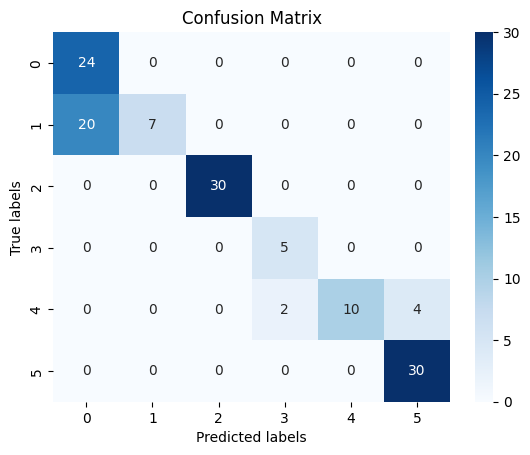

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Compute predictions
y_pred_hard = voting_clf_hard.predict(X_test)

# Accuracy
accuracy_hard = accuracy_score(y_test, y_pred_hard)
print("Accuracy: ", accuracy_hard * 100)

# Precision
precision = precision_score(y_test, y_pred_hard, average='weighted')
print("Precision: ", precision * 100)

# Recall
recall = recall_score(y_test, y_pred_hard, average='weighted')
print("Recall: ", recall * 100)

# F1 score
f1 = f1_score(y_test, y_pred_hard, average='macro')
print("F1 Score: ", f1 * 100)

confusion = confusion_matrix(y_test, y_pred_hard)

# Create a heatmap of the confusion matrix
sns.heatmap(confusion, annot=True, cmap="Blues")
plt.xlabel("Predicted labels")
plt.ylabel("True labels")
plt.title("Confusion Matrix")
plt.show()



Accuracy:  96.96969696969697
Precision:  97.32620320855615
Recall:  96.96969696969697
F1 Score:  96.57738095238095


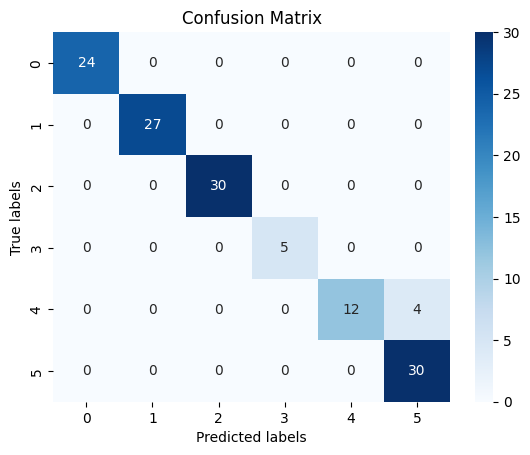

In [ ]:
y_pred_soft = voting_clf_soft.predict(X_test)

# Accuracy
accuracy_soft = accuracy_score(y_test, y_pred_soft)
print("Accuracy: ", accuracy_soft * 100)

# Precision
precision_soft = precision_score(y_test, y_pred_soft, average='weighted')
print("Precision: ", precision_soft * 100)

# Recall
recall_soft = recall_score(y_test, y_pred_soft, average='weighted')
print("Recall: ", recall_soft * 100)

# F1 score
f1_soft = f1_score(y_test, y_pred_soft, average='macro')
print("F1 Score: ", f1_soft * 100)

confusion_soft = confusion_matrix(y_test, y_pred_soft)

# Create a heatmap of the confusion matrix
sns.heatmap(confusion_soft, annot=True, cmap="Blues")
plt.xlabel("Predicted labels")
plt.ylabel("True labels")
plt.title("Confusion Matrix")
plt.show()



Accuracy:  96.96969696969697
Precision:  97.32620320855615
Recall:  96.96969696969697
F1 Score:  96.57738095238095


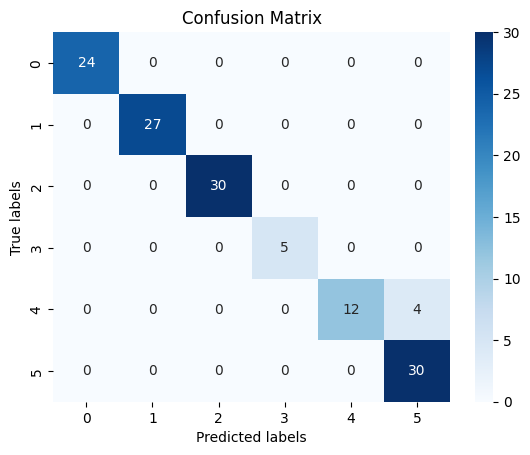

In [ ]:
y_pred_weighted = voting_clf_weighted.predict(X_test)

# Accuracy
accuracy_weighted = accuracy_score(y_test, y_pred_weighted)
print("Accuracy: ", accuracy_weighted * 100)

# Precision
precision_weighted = precision_score(y_test, y_pred_weighted, average='weighted')
print("Precision: ", precision_weighted * 100)

# Recall
recall_weighted = recall_score(y_test, y_pred_weighted, average='weighted')
print("Recall: ", recall_weighted * 100)

# F1 score
f1_weighted = f1_score(y_test, y_pred_weighted, average='macro')
print("F1 Score: ", f1_weighted * 100)

confusion_weighted = confusion_matrix(y_test, y_pred_weighted)

# Create a heatmap of the confusion matrix
sns.heatmap(confusion_weighted, annot=True, cmap="Blues")
plt.xlabel("Predicted labels")
plt.ylabel("True labels")
plt.title("Confusion Matrix")
plt.show()



In [ ]:
global models
models = {
        'svm_ensemble': svm_ensemble,
        'nb_ensemble': nb_ensemble,
        'rf_ensemble': rf_ensemble,
        'cart_ensemble': cart_ensemble,
        'voting_clf_hard': voting_clf_hard,
        'voting_clf_soft': voting_clf_soft,
        'voting_clf_weighted': voting_clf_weighted
    }

In [ ]:
label_mapping = {
    0: "pure bamboo",
    1: "dominant bamboo",
    2: "mixed bamboo",
    3: "forest",
    4: "land",
    5: "water"
}

# Define a function to evaluate the accuracy of each model
def evaluate_models(models, X_test, y_test):
    accuracies = {}
    for model_name, model in models.items():
        y_pred = model.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)
        accuracies[model_name] = accuracy
        print(f"{model_name} Accuracy: {accuracy*100:.2f}")
    return accuracies

# Define a function to make predictions based on user input
def predict_location_from_input(models):
    # Get latitude and longitude from user input
    latitude = float(input("Enter latitude: "))
    longitude = float(input("Enter longitude: "))
    system_index = input("Enter System Index: ")
    print("\n")

    # Preprocess the input coordinates
    input_data = pd.DataFrame({'latitude': [latitude], 'longitude': [longitude], 'system:index': [system_index]})

    # Use the ensemble models to make predictions
    predictions = {}
    for model_name, model in models.items():
        prediction = model.predict(input_data)[0]

        # Map the numeric prediction to a string label
        predicted_label = label_mapping.get(prediction, "Unknown")

        predictions[model_name] = predicted_label

    return predictions

# Evaluate the models on the test data
model_accuracies = evaluate_models(models, X_test, y_test)

# Select the best-fit model based on accuracy
best_model_name = max(model_accuracies, key=model_accuracies.get)
best_model = models[best_model_name]

# Use the best-fit model to make predictions based on user input
results = predict_location_from_input({best_model_name: best_model})
for model, prediction in results.items():
    print(f"{model}: {prediction}")


svm_ensemble Accuracy: 56.06
nb_ensemble Accuracy: 76.52
rf_ensemble Accuracy: 92.42
cart_ensemble Accuracy: 81.06
voting_clf_hard Accuracy: 80.30
voting_clf_soft Accuracy: 96.97
voting_clf_weighted Accuracy: 96.97
Enter latitude: 93.53852351351873
Enter longitude: 26.39130596673823
Enter System Index: 1_1_2_7


voting_clf_soft: forest
